## Facies Prediction 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
import sys
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly import graph_objs as go
from plotly import tools
# Import our custom modules
sys.path.append("..")
from mysticbit import ml, munging, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


In [2]:
well_data = pd.read_csv("C:\\Users\\Toyin Obasoro\\Desktop\\Kunle practise\\Well 4.csv")

In [3]:
well_data.head()

,DEPTH,NEU,CAL,FDC,GR,RES_D,SP
0,4398.0,0.54,-999.25,-999.25,-999.25,-999.25,-999.25
1,4398.5,0.54,-999.25,-999.25,-999.25,-999.25,-999.25
2,4399.0,0.53,-999.25,-999.25,-999.25,-999.25,-999.25
3,4399.5,0.53,-999.25,-999.25,-999.25,-999.25,-999.25
4,4400.0,0.51,-999.25,-999.25,-999.25,-999.25,-999.25


In [4]:
well_log = pd.read_csv("C:\\Users\\Toyin Obasoro\\Desktop\\Kunle practise\\freeman-well.csv")

In [5]:
well_log.head()

,TVDSS,DEPT,DEN,DT,GR,NEUT,RES
0,1717.0908,5633.5,-999.25,-999.25,12.159700,-999.25,-999.25
1,1717.2432,5634.0,-999.25,-999.25,44.075001,-999.25,-999.25
2,1717.3956,5634.5,-999.25,-999.25,44.075001,-999.25,-999.25
3,1717.5480,5635.0,-999.25,-999.25,44.075001,-999.25,-999.25
4,1717.7004,5635.5,-999.25,-999.25,43.715900,-999.25,-999.25


In [6]:
well_log.isnull().sum()

TVDSS    0
DEPT     0
DEN      0
DT       0
GR       0
NEUT     0
RES      0
dtype: int64

In [23]:
well_log

In [7]:
well_data.shape

(5613, 7)

In [8]:
well_log = well_log.rename(columns={'DEN': 'RHOB','NEUT':'NPHI'})

In [9]:
well_log.head()

,TVDSS,DEPT,RHOB,DT,GR,NPHI,RES
0,1717.0908,5633.5,-999.25,-999.25,12.159700,-999.25,-999.25
1,1717.2432,5634.0,-999.25,-999.25,44.075001,-999.25,-999.25
2,1717.3956,5634.5,-999.25,-999.25,44.075001,-999.25,-999.25
3,1717.5480,5635.0,-999.25,-999.25,44.075001,-999.25,-999.25
4,1717.7004,5635.5,-999.25,-999.25,43.715900,-999.25,-999.25


In [13]:
well_log['Facies'] = ml.create_facies(well_log)

ValueError: Wrong number of items passed 8, placement implies 1

In [37]:
well_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8214 entries, 0 to 8213
Data columns (total 8 columns):
TVDSS     8214 non-null float64
DEPT      8214 non-null float64
RHOB      8214 non-null float64
DT        8214 non-null float64
GR        8214 non-null float64
NPHI      8214 non-null float64
RES       8214 non-null float64
facies    8214 non-null object
dtypes: float64(7), object(1)
memory usage: 513.5+ KB


In [38]:
well_log.describe()

,TVDSS,DEPT,RHOB,DT,GR,NPHI,RES
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000
mean,2342.921400,7686.750000,-28.426668,96.234156,78.585432,-32.925822,-22.860791
std,361.389456,1185.660944,172.371419,222.241806,95.708795,179.859278,181.192382
min,1717.090800,5633.500000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,2030.006100,6660.125000,2.093500,129.800003,80.451977,0.454700,0.887100
50%,2342.921400,7686.750000,2.187000,137.899994,89.145000,0.516600,1.043350
75%,2655.836700,8713.375000,2.257800,150.800003,97.775078,0.600700,1.282300
max,2968.752000,9740.000000,2.634200,209.800003,125.198998,1.795600,1950.000000


In [39]:
import seaborn as sns

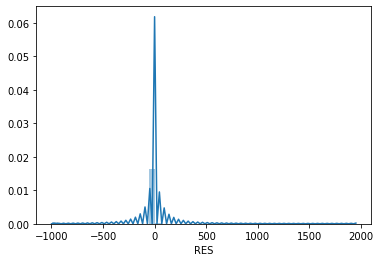

In [51]:
sns.distplot(well_log.RES)

NameError: name 'well' is not defined

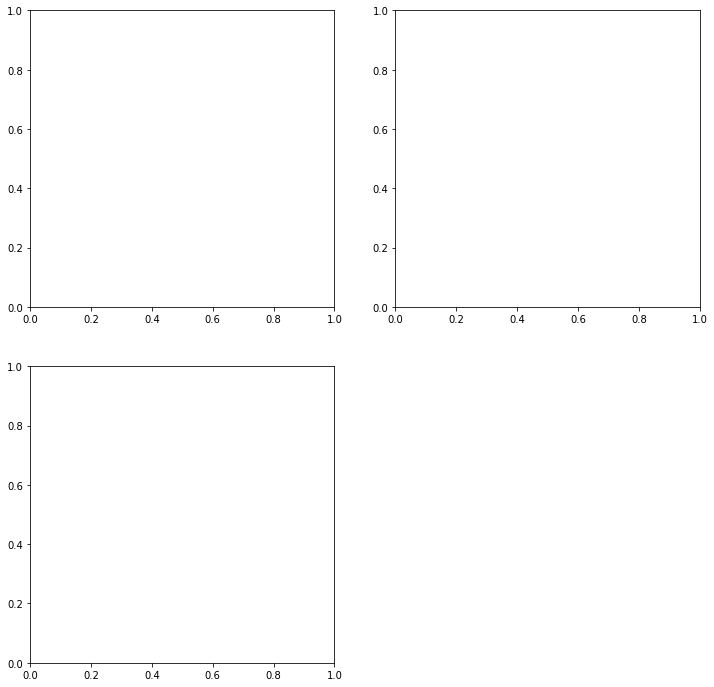

In [62]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

_ = ax1.hist(well.log(['GR']), bin=20, alpha=0.3)
                      

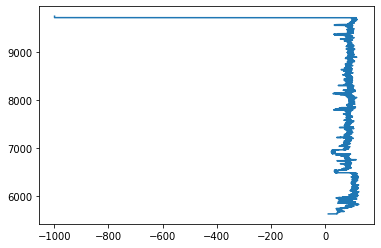

In [58]:
plt.plot(well_log.GR, well_log.DEPT )